In [1]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import scipy.stats as st
import statsmodels.api as sm

C:\Users\sngupta\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize']= (12, 12)
plt.style.use('ggplot')
sns.set(style= 'darkgrid', color_codes= True)

In [4]:
#read the data
train= pd.read_csv('TRAIN.csv')
test= pd.read_csv('TEST.csv')

In [5]:
train.shape, test.shape

((193851, 2), (6326, 1))

In [6]:
train.head()

,text,author
0,They have been pronounced by an\r\r\r\r\r\nexp...,2
1,His partner sailed along in\r\r\r\r\r\nfront o...,0
2,The cushions were a good deal higher\r\r\r\r\n...,5
3,"O God, grant that in his presence I may\r\r\r\...",4
4,The grass\r\r\r\r\r\nglowed with bright and fr...,0


In [7]:
for i in [0, 10, 100, 1000, 5000]:
    print(train.iloc[i]['text'])
    print('----------------------------------------------------------------------------------------------')






















a packet., Particular man in his stationery.
----------------------------------------------------------------------------------------------


































































































































27.
----------------------------------------------------------------------------------------------






































Arjuna of the Mahabharata.
----------------------------------------------------------------------------------------------





















































      that is about the word.
----------------------------------------------------------------------------------------------
nan
----------------------------------------------------------------------------------------------


In [8]:
#check the null values train and test
train.isnull().sum()

text      153756
author    133413
dtype: int64

In [9]:
train.loc[train['text'].isnull()==True].head()

,text,author
2304,NaN,unity; he reeled under his good fortune; and w...
2305,NaN,NaN
2306,NaN,NaN
2307,NaN,NaN
2309,NaN,NaN


In [10]:
len(train['author'].unique())

38524

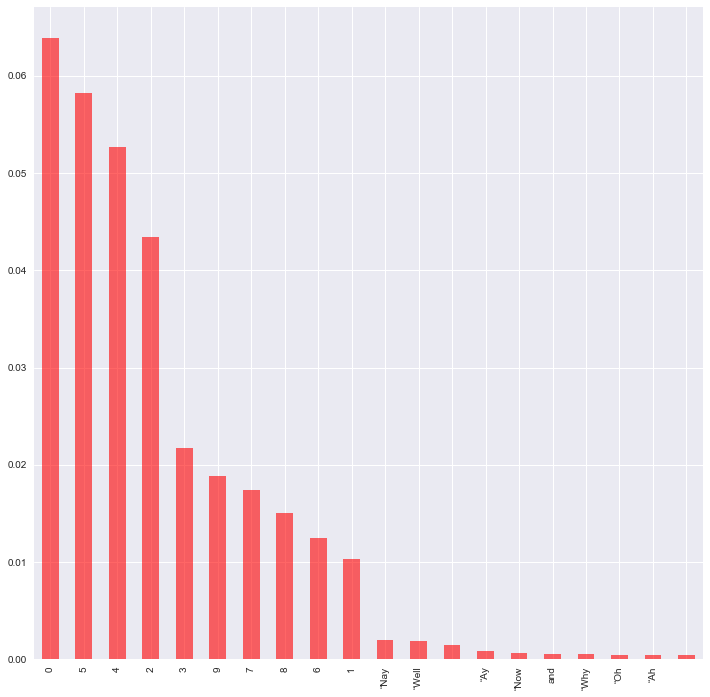

In [11]:
train['author'].value_counts(normalize= True)[:20].plot(kind= 'bar', color= 'red', alpha= 0.6)

In [12]:
train.dtypes

text      object
author    object
dtype: object

In [13]:
train_df= train.dropna()

In [14]:
len(train_df['author'].unique())

18708

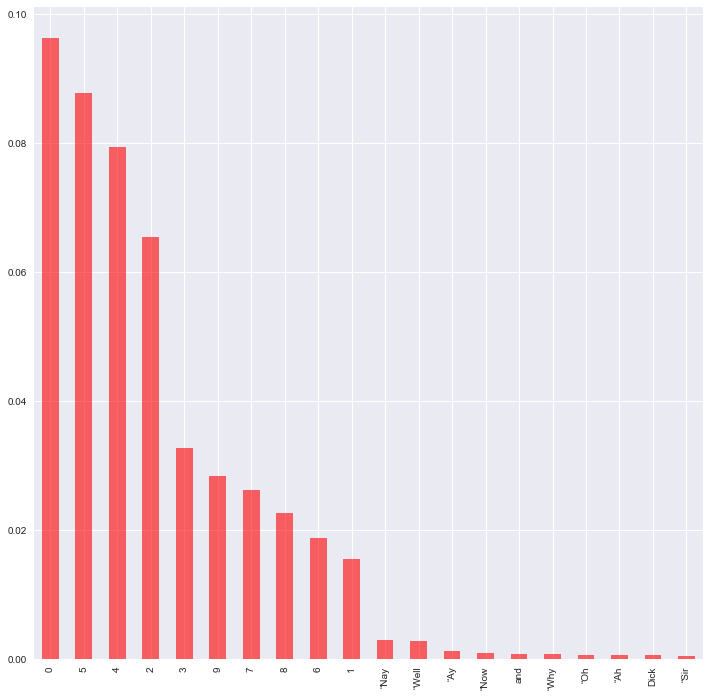

In [15]:
train_df['author'].value_counts(normalize= True)[:20].plot(kind= 'bar', color= 'red', alpha= 0.6)

In [16]:
train_df= train[train['author'].str.isdigit()==True]

In [17]:
train_df.shape

(18996, 2)

In [18]:
train_df= train_df[train_df['author'].str.len()==1]

In [19]:
train_df.shape

(18982, 2)

In [20]:
train_df['author'].value_counts()

0    3859
5    3517
4    3184
2    2623
3    1315
9    1142
7    1054
8     910
6     755
1     623
Name: author, dtype: int64

In [21]:
train_df['author']= train_df['author'].astype(int)

In [22]:
train_df.dropna(inplace= True)

In [23]:
train_df.dtypes

text      object
author     int32
dtype: object

In [25]:
train_df.shape

(18980, 2)

In [26]:
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

In [63]:
#fucntion for the ml_modeling
#this is simple modeling function without doing any cleaning
def ml_modeling(model, train, target, test, countVecorizer= True, tfidfVecorizer= False):
    X_train, X_test, y_train, y_test= train_test_split(train, target, random_state= 5)
    
    if countVecorizer:
        print('Using Count Vectorizer: ')
        print('-------------------------------------------------------------------------------------------')
        vect= CountVectorizer().fit(X_train)
        X_train_vect= vect.transform(X_train)
        print(X_train_vect.shape)
        
        model.fit(X_train_vect, y_train)
        prediction= model.predict(vect.transform(X_test))
        
        #print accuracies
        train_acc= model.score(X_train_vect, y_train)
        val_acc= accuracy_score(y_test, prediction)
        #roc_auc= roc_auc_score(y_test, prediction)
        
        print('The training accuracy: {:.4f}' .format(train_acc))
        print('The validation accuracy: {:.4f}' .format(val_acc))
        #print('The roc_auc_score: {:.4f}' .format(roc_auc))
        print('Classification Report: ')
        print(classification_report(y_test, prediction))
        
        print('Detail about the features!')
        feature_name= np.array(vect.get_feature_names())
        coef_=  model.coef_[0].argsort()
        
        plt.subplot(211)
        plt.bar(feature_name[coef_[:10]], coef_[:10], align= 'center', color= 'brown', alpha= 0.8)
        plt.title('Smallest Coefficient Features')
        plt.xlabel('features_names')
        plt.ylabel('coefficient')
        
        plt.subplot(212)
        plt.bar(feature_name[coef_][:-11:-1], coef_[:-11:-1], align= 'center', color= 'brown', alpha= 0.8)
        plt.title('Largest Coefficient Features')
        plt.xlabel('features_names')
        plt.ylabel('coefficient')
        plt.show()
        print('--------------------------------------------------------------------------------------------------')
        
    if tfidfVecorizer:
        print('Using Tfidf Vectorizer: ')
        print('-------------------------------------------------------------------------------------------')
        vect= TfidfVectorizer(min_df= 5, ngram_range= (1,2)).fit(X_train)
        X_train_tfidf= vect.transform(X_train)
        print(X_train_tfidf.shape)
        
        model.fit(X_train_tfidf, y_train)
        prediction_= model.predict(vect.transform(X_test))
        
        #print accuracies
        train_acc_= model.score(X_train_tfidf, y_train)
        val_acc_= accuracy_score(y_test, prediction_)
        #roc_auc_= roc_auc_score(y_test, prediction_)
        
        print('The training accuracy: {:.4f}' .format(train_acc_))
        print('The validation accuracy: {:.4f}' .format(val_acc_))
        #print('The roc_auc_score: {:.4f}' .format(roc_auc_))
        print('Classification Report: ')
        print(classification_report(y_test, prediction_))
        
        print('Detail about the features!')
        feature_name_= np.array(vect.get_feature_names())
        coef__=  model.coef_[0].argsort()
        
        plt.subplot(211)
        plt.bar(feature_name_[coef__[:10]], coef__[:10], align= 'center', color= 'brown', alpha= 0.8)
        plt.title('Smallest Coefficient Features')
        plt.xlabel('features_names')
        plt.ylabel('coefficient')
        
        plt.subplot(212)
        plt.bar(feature_name_[coef__][:-11:-1], coef__[:-11:-1], align= 'center', color= 'brown', alpha= 0.8)
        plt.title('Largest Coefficient Features')
        plt.xlabel('features_names')
        plt.ylabel('coefficient')
        plt.show()
        
    return model.predict(vect.transform(test))

Using Count Vectorizer: 
-------------------------------------------------------------------------------------------
(14235, 63289)
The training accuracy: 0.9999
The validation accuracy: 0.9707
Classification Report: 
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       960
          1       0.99      0.98      0.99       171
          2       0.96      0.97      0.96       649
          3       1.00      0.99      1.00       315
          4       0.97      0.96      0.97       806
          5       0.96      0.98      0.97       865
          6       1.00      0.97      0.99       181
          7       0.97      0.91      0.94       261
          8       0.99      0.98      0.98       250
          9       0.97      0.95      0.96       287

avg / total       0.97      0.97      0.97      4745

Detail about the features!


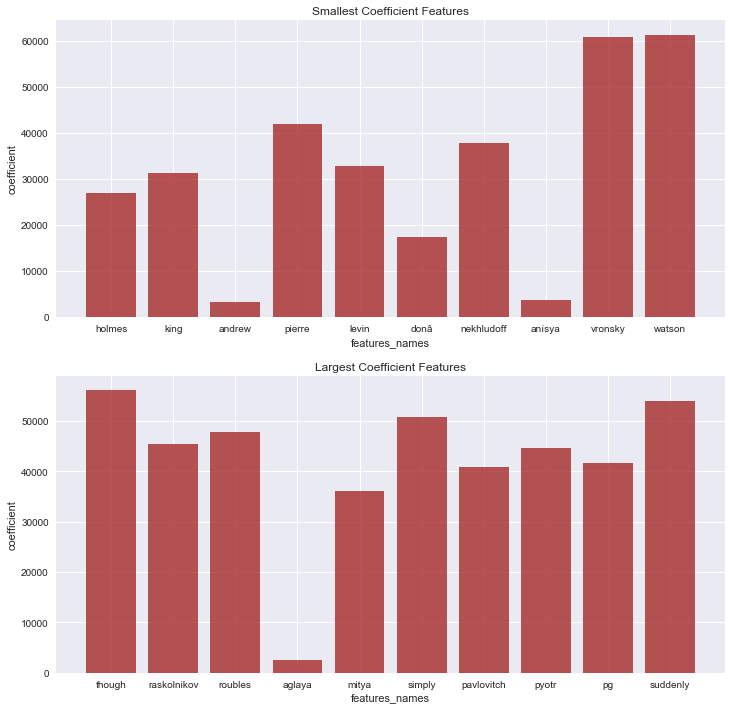

--------------------------------------------------------------------------------------------------


In [64]:
clf_log= LogisticRegression(random_state= 0)
pred_count_1= ml_modeling(clf_log, train_df['text'], train_df['author'], test['text'])

Using Tfidf Vectorizer: 
-------------------------------------------------------------------------------------------
(14235, 154496)
The training accuracy: 0.9760
The validation accuracy: 0.9342
Classification Report: 
             precision    recall  f1-score   support

          0       0.90      0.98      0.94       960
          1       0.99      0.88      0.93       171
          2       0.94      0.96      0.95       649
          3       1.00      0.98      0.99       315
          4       0.94      0.93      0.94       806
          5       0.89      0.97      0.92       865
          6       0.97      0.92      0.94       181
          7       0.96      0.80      0.87       261
          8       1.00      0.85      0.92       250
          9       0.98      0.84      0.90       287

avg / total       0.94      0.93      0.93      4745

Detail about the features!


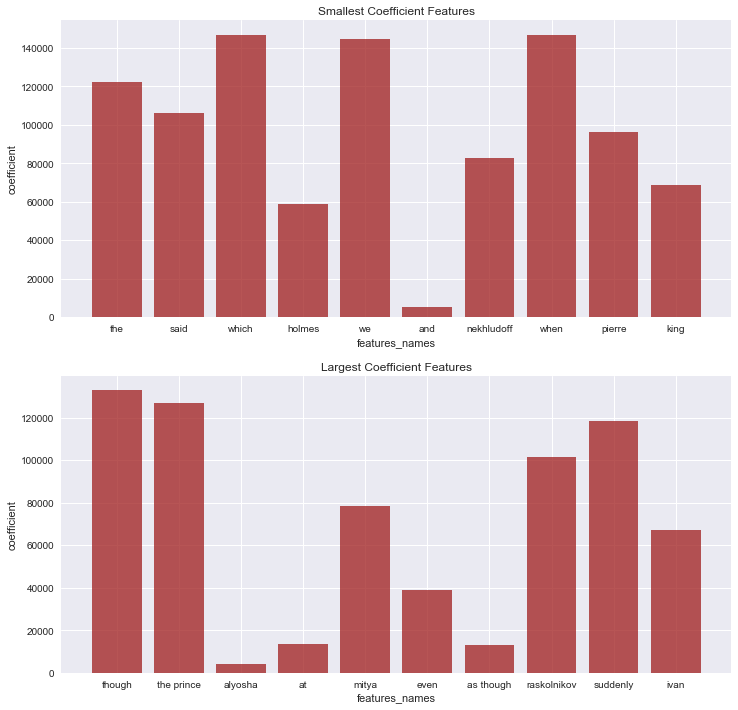

In [66]:
pred_tfidf_1= ml_modeling(clf_log, train_df['text'], train_df['author'], test['text'], False, True)

In [69]:
sample_1= pd.DataFrame({
    'author': pred_count_1
})

In [70]:
sample_1.head()

,author
0,0
1,2
2,5
3,4
4,0


In [71]:
sample_1.to_excel('sample_1.xlsx', index= False)

In [72]:
sample_2= pd.DataFrame({
    'author': pred_tfidf_1
})

In [73]:
sample_2.to_excel('sample_2.xlsx', index= False)

Using Count Vectorizer: 
-------------------------------------------------------------------------------------------
(14235, 63289)
The training accuracy: 0.9594
The validation accuracy: 0.9302
Classification Report: 
             precision    recall  f1-score   support

          0       0.91      0.95      0.93       960
          1       0.96      0.90      0.93       171
          2       0.97      0.97      0.97       649
          3       0.99      0.99      0.99       315
          4       0.94      0.89      0.92       806
          5       0.94      0.95      0.94       865
          6       0.75      0.99      0.85       181
          7       0.83      0.80      0.82       261
          8       0.99      0.94      0.97       250
          9       0.98      0.84      0.90       287

avg / total       0.93      0.93      0.93      4745

Detail about the features!


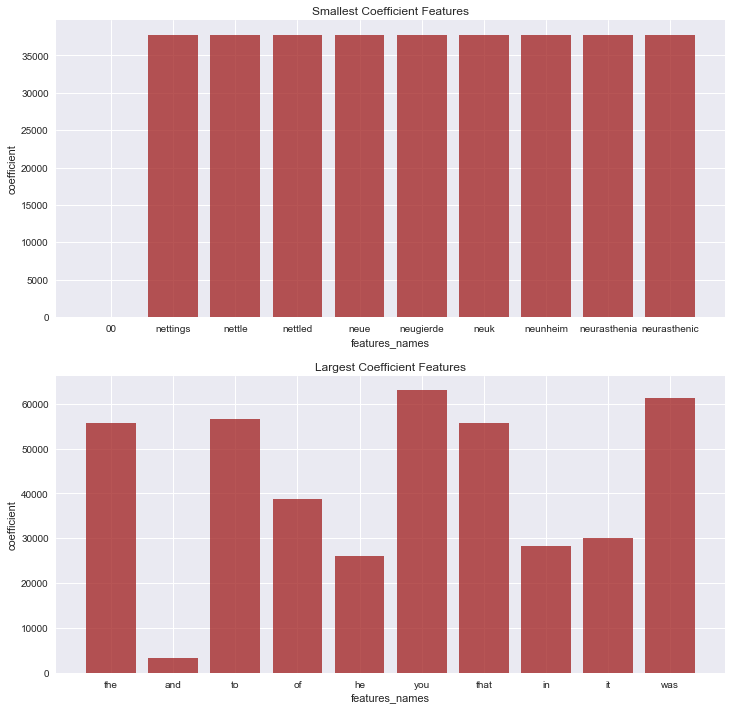

--------------------------------------------------------------------------------------------------


In [76]:
clf_mnb= MultinomialNB()
pred_count_2= ml_modeling(clf_mnb, train_df['text'], train_df['author'], test['text'])

Using Tfidf Vectorizer: 
-------------------------------------------------------------------------------------------
(14235, 154496)
The training accuracy: 0.7197
The validation accuracy: 0.6658
Classification Report: 
             precision    recall  f1-score   support

          0       0.57      1.00      0.73       960
          1       0.00      0.00      0.00       171
          2       1.00      0.76      0.86       649
          3       1.00      0.56      0.71       315
          4       0.93      0.86      0.89       806
          5       0.50      0.93      0.65       865
          6       1.00      0.03      0.06       181
          7       1.00      0.11      0.20       261
          8       0.00      0.00      0.00       250
          9       0.00      0.00      0.00       287

avg / total       0.66      0.67      0.60      4745

Detail about the features!


C:\Users\sngupta\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


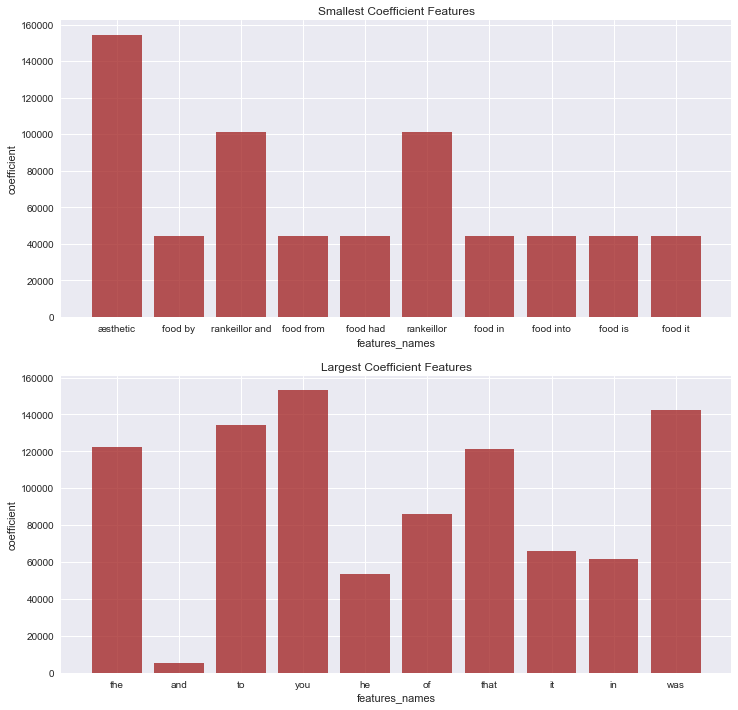

In [77]:
pred_tfidf_2= ml_modeling(clf_mnb, train_df['text'], train_df['author'], test['text'], False, True)

In [29]:
def vectorizer(train, target, test, countVect= True, tfidfVect= False):
    
    X_train, X_test, y_train, y_test= train_test_split(train, target, random_state= 5, test_size= 0.33)
    
    if countVect:
        vect= CountVectorizer().fit(X_train)
        
        X_train= vect.transform(X_train)
        X_test= vect.transform(X_test)
        
        test= vect.transform(test)
        
    if tfidfVect:
        vect= TfidfVectorizer(min_df= 5, ngram_range= (1, 2)).fit(X_train)
        
        X_train= vect.transform(X_train)
        X_test= vect.transform(X_test)
        
        test= vect.transform(test)
        
    return X_train, X_test, y_train, y_test, test

In [30]:
X_train_c, X_test_c, y_train, y_test, test_vect_c= vectorizer(train_df['text'], train_df['author'], test['text'])

In [31]:
X_train_c.shape, X_test_c.shape, y_train.shape, y_test.shape, test_vect_c.shape

((12716, 60751), (6264, 60751), (12716,), (6264,), (6326, 60751))

In [33]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.losses import categorical_crossentropy
from keras.optimizers import SGD, Adam
from keras.utils import np_utils

In [41]:
y_train_dummy= np_utils.to_categorical(y_train)
y_test_dummy= np_utils.to_categorical(y_test)

In [48]:
#create model using keras
model= Sequential()

model.add(Dense(activation= 'relu', units= 50, input_dim= X_train_c.shape[1]))
model.add(Dense(activation= 'relu', units= 25))
model.add(Dense(activation= 'softmax', units= 10))

model.compile(optimizer= 'adam', loss= 'categorical_hinge', metrics= ['accuracy'])

model.fit(X_train_c, y_train_dummy, batch_size= 187, epochs= 5, validation_data= (X_test_c, y_test_dummy))

prediction= model.predict_classes(X_test_c, batch_size= 187)

print('Training details: ', model.evaluate(X_train_c, y_train_dummy, batch_size= 187))

test_acc= accuracy_score(y_test, prediction)

print('Testing accuracy: {}' .format(test_acc))

Train on 12716 samples, validate on 6264 samples
Epoch 1/5
12716/12716 [==============================] - 24s 2ms/step - loss: 0.8852 - acc: 0.5487 - val_loss: 0.6438 - val_acc: 0.6604
Epoch 2/5
12716/12716 [==============================] - 20s 2ms/step - loss: 0.4178 - acc: 0.8219 - val_loss: 0.3066 - val_acc: 0.8795
Epoch 3/5
12716/12716 [==============================] - 20s 2ms/step - loss: 0.1499 - acc: 0.9608 - val_loss: 0.1439 - val_acc: 0.9652
Epoch 4/5
12716/12716 [==============================] - 21s 2ms/step - loss: 0.0451 - acc: 0.9905 - val_loss: 0.1001 - val_acc: 0.9717
Epoch 5/5
12716/12716 [==============================] - 8s 607us/step
Training details:  [0.011766238884507296, 0.9984271763002172]
Training accuracy: 0.9763729246487867


In [49]:
Counter(prediction)

Counter({0: 1272,
         1: 218,
         2: 890,
         3: 412,
         4: 1056,
         5: 1157,
         6: 241,
         7: 329,
         8: 328,
         9: 361})

In [50]:
samp_3= model.predict_classes(test_vect_c)

In [51]:
Counter(samp_3)

Counter({0: 1307,
         1: 204,
         2: 880,
         3: 427,
         4: 1047,
         5: 1180,
         6: 250,
         7: 340,
         8: 295,
         9: 396})

In [52]:
sample_3= pd.DataFrame({
    'author': samp_3
})

In [53]:
sample_3.to_excel('sample_3.xlsx', index= False)

In [58]:
#create model using keras
model= Sequential()

model.add(Dense(activation= 'relu', units= 50, input_dim= X_train_c.shape[1]))
model.add(Dense(activation= 'relu', units= 25))
model.add(Dense(activation= 'softmax', units= 10))

model.compile(optimizer= 'adam', loss= 'categorical_hinge', metrics= ['accuracy'])

model.fit(X_train_c, y_train_dummy, batch_size= 187, epochs= 8, validation_data= (X_test_c, y_test_dummy))

prediction= model.predict_classes(X_test_c, batch_size= 187)

print('Training details: ', model.evaluate(X_train_c, y_train_dummy, batch_size= 187))

test_acc= accuracy_score(y_test, prediction)

print('Testing accuracy: {}' .format(test_acc))

Train on 12716 samples, validate on 6264 samples
Epoch 1/8
12716/12716 [==============================] - 65s 5ms/step - loss: 0.8696 - acc: 0.6342 - val_loss: 0.5616 - val_acc: 0.8292
Epoch 2/8
12716/12716 [==============================] - 20s 2ms/step - loss: 0.3340 - acc: 0.8753 - val_loss: 0.2513 - val_acc: 0.9106
Epoch 3/8
12716/12716 [==============================] - 20s 2ms/step - loss: 0.1461 - acc: 0.9443 - val_loss: 0.1665 - val_acc: 0.9337
Epoch 4/8
12716/12716 [==============================] - 20s 2ms/step - loss: 0.0931 - acc: 0.9534 - val_loss: 0.1485 - val_acc: 0.9363
Epoch 5/8
12716/12716 [==============================] - 20s 2ms/step - loss: 0.0806 - acc: 0.9564 - val_loss: 0.1499 - val_acc: 0.9349
Epoch 6/8
12716/12716 [==============================] - 20s 2ms/step - loss: 0.0755 - acc: 0.9581 - val_loss: 0.1315 - val_acc: 0.9398
Epoch 7/8
12716/12716 [==============================] - 20s 2ms/step - loss: 0.0728 - acc: 0.9590 - val_loss: 0.1360 - val_acc: 0.9384

In [60]:
#create model using keras
model= Sequential()

model.add(Dense(activation= 'relu', units= 50, input_dim= X_train_c.shape[1]))
model.add(Dense(activation= 'relu', units= 25))
model.add(Dense(activation= 'softmax', units= 10))

model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.fit(X_train_c, y_train_dummy, batch_size= 187, epochs= 5, validation_data= (X_test_c, y_test_dummy))

prediction= model.predict_classes(X_test_c, batch_size= 187)

print('Training details: ', model.evaluate(X_train_c, y_train_dummy, batch_size= 187))

test_acc= accuracy_score(y_test, prediction)

print('Testing accuracy: {}' .format(test_acc))

Train on 12716 samples, validate on 6264 samples
Epoch 1/5
12716/12716 [==============================] - 23s 2ms/step - loss: 1.0281 - acc: 0.7406 - val_loss: 0.3455 - val_acc: 0.9480
Epoch 2/5
12716/12716 [==============================] - 20s 2ms/step - loss: 0.1557 - acc: 0.9845 - val_loss: 0.1558 - val_acc: 0.9741
Epoch 3/5
12716/12716 [==============================] - 21s 2ms/step - loss: 0.0444 - acc: 0.9984 - val_loss: 0.1124 - val_acc: 0.9757
Epoch 4/5
12716/12716 [==============================] - 20s 2ms/step - loss: 0.0182 - acc: 0.9995 - val_loss: 0.0967 - val_acc: 0.9756
Epoch 5/5
12716/12716 [==============================] - 8s 593us/step
Training details:  [0.006931314073667368, 0.9998427173670601]
Testing accuracy: 0.9779693486590039


In [62]:
samp_4= model.predict_classes(test_vect_c)

In [66]:
sample_4= pd.DataFrame({
    'author': samp_4
})

sample_4.to_excel('sample_4.xlsx', index= False)

In [63]:
X_train_t, X_test_t, y_train, y_test, test_vect_t= vectorizer(train_df['text'], train_df['author'], test['text'], False, True)

C:\Users\sngupta\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [64]:
X_train_t.shape, X_test_t.shape, test_vect_t.shape

((12716, 140726), (6264, 140726), (6326, 140726))

In [65]:
#create model using keras
model= Sequential()

model.add(Dense(activation= 'relu', units= 50, input_dim= X_train_t.shape[1]))
model.add(Dense(activation= 'relu', units= 25))
model.add(Dense(activation= 'softmax', units= 10))

model.compile(optimizer= 'adam', loss= 'categorical_hinge', metrics= ['accuracy'])

model.fit(X_train_t, y_train_dummy, batch_size= 187, epochs= 5, validation_data= (X_test_t, y_test_dummy))

prediction= model.predict_classes(X_test_t, batch_size= 187)

print('Training details: ', model.evaluate(X_train_t, y_train_dummy, batch_size= 187))

test_acc= accuracy_score(y_test, prediction)

print('Testing accuracy: {}' .format(test_acc))

Train on 12716 samples, validate on 6264 samples
Epoch 1/5
12716/12716 [==============================] - 79s 6ms/step - loss: 0.9929 - acc: 0.6349 - val_loss: 0.9654 - val_acc: 0.7428
Epoch 2/5
12716/12716 [==============================] - 48s 4ms/step - loss: 0.7930 - acc: 0.7276 - val_loss: 0.6370 - val_acc: 0.7286
Epoch 3/5
12716/12716 [==============================] - 48s 4ms/step - loss: 0.3807 - acc: 0.8331 - val_loss: 0.3196 - val_acc: 0.8600
Epoch 4/5
12716/12716 [==============================] - 48s 4ms/step - loss: 0.1660 - acc: 0.9390 - val_loss: 0.2100 - val_acc: 0.9577
Epoch 5/5
12716/12716 [==============================] - 17s 1ms/step
Training details:  [0.020098861635607833, 0.9987417398130193]
Testing accuracy: 0.9763729246487867


In [69]:
samp_5= model.predict_classes(test_vect_t)

sample_5= pd.DataFrame({
    'author': samp_5
})

sample_5.to_excel('sample_5.xlsx', index= False)

In [68]:
#create model using keras
model= Sequential()

model.add(Dense(activation= 'relu', units= 100, input_dim= X_train_t.shape[1]))
model.add(Dense(activation= 'relu', units= 40))
model.add(Dense(activation= 'softmax', units= 10))

model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.fit(X_train_t, y_train_dummy, batch_size= 227, epochs= 7, validation_data= (X_test_t, y_test_dummy))

prediction= model.predict_classes(X_test_t, batch_size= 227)

print('Training details: ', model.evaluate(X_train_t, y_train_dummy, batch_size= 227))

test_acc= accuracy_score(y_test, prediction)

print('Testing accuracy: {}' .format(test_acc))

Train on 12716 samples, validate on 6264 samples
Epoch 1/7
12716/12716 [==============================] - 144s 11ms/step - loss: 1.8092 - acc: 0.5080 - val_loss: 1.1409 - val_acc: 0.6960
Epoch 2/7
12716/12716 [==============================] - 78s 6ms/step - loss: 0.5459 - acc: 0.9044 - val_loss: 0.3524 - val_acc: 0.9542
Epoch 3/7
12716/12716 [==============================] - 71s 6ms/step - loss: 0.0871 - acc: 0.9976 - val_loss: 0.1921 - val_acc: 0.9735
Epoch 4/7
12716/12716 [==============================] - 70s 6ms/step - loss: 0.0235 - acc: 0.9998 - val_loss: 0.1513 - val_acc: 0.9745
Epoch 5/7
12716/12716 [==============================] - 65s 5ms/step - loss: 0.0113 - acc: 0.9998 - val_loss: 0.1320 - val_acc: 0.9741
Epoch 6/7
12716/12716 [==============================] - 70s 6ms/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.1206 - val_acc: 0.9754
Epoch 7/7
12716/12716 [==============================] - 21s 2ms/step
Training details:  [0.003476660350010534, 1.0]
Testing accuracy

In [70]:
samp_6= model.predict_classes(test_vect_t)

sample_6= pd.DataFrame({
    'author': samp_6
})

sample_6.to_excel('sample_6.xlsx', index= False)

In [71]:
#create model using keras
model= Sequential()

model.add(Dense(activation= 'relu', units= 50, input_dim= X_train_c.shape[1]))
model.add(Dense(activation= 'relu', units= 25))
model.add(Dense(activation= 'softmax', units= 10))

model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.fit(X_train_c, y_train_dummy, batch_size= 187, epochs= 10, validation_data= (X_test_c, y_test_dummy))

prediction= model.predict_classes(X_test_c, batch_size= 187)

print('Training details: ', model.evaluate(X_train_c, y_train_dummy, batch_size= 187))

test_acc= accuracy_score(y_test, prediction)

print('Testing accuracy: {}' .format(test_acc))

Train on 12716 samples, validate on 6264 samples
Epoch 1/10
12716/12716 [==============================] - 33s 3ms/step - loss: 1.0368 - acc: 0.7441 - val_loss: 0.3444 - val_acc: 0.9529
Epoch 2/10
12716/12716 [==============================] - 21s 2ms/step - loss: 0.1484 - acc: 0.9836 - val_loss: 0.1636 - val_acc: 0.9697
Epoch 3/10
12716/12716 [==============================] - 25s 2ms/step - loss: 0.0478 - acc: 0.9980 - val_loss: 0.1256 - val_acc: 0.9708
Epoch 4/10
12716/12716 [==============================] - 22s 2ms/step - loss: 0.0198 - acc: 0.9995 - val_loss: 0.1080 - val_acc: 0.9713
Epoch 5/10
12716/12716 [==============================] - 24s 2ms/step - loss: 0.0111 - acc: 0.9997 - val_loss: 0.0988 - val_acc: 0.9725
Epoch 6/10
12716/12716 [==============================] - 22s 2ms/step - loss: 0.0067 - acc: 0.9998 - val_loss: 0.0949 - val_acc: 0.9724
Epoch 7/10
12716/12716 [==============================] - 21s 2ms/step - loss: 0.0043 - acc: 0.9998 - val_loss: 0.0904 - val_acc:

In [72]:
#create model using keras
model= Sequential()

model.add(Dense(activation= 'relu', units= 150, input_dim= X_train_c.shape[1]))
model.add(Dense(activation= 'relu', units= 75))
model.add(Dense(activation= 'relu', units= 25))
model.add(Dense(activation= 'softmax', units= 10))

model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.fit(X_train_c, y_train_dummy, batch_size= 287, epochs= 5, validation_data= (X_test_c, y_test_dummy))

prediction= model.predict_classes(X_test_c, batch_size= 287)

print('Training details: ', model.evaluate(X_train_c, y_train_dummy, batch_size= 287))

test_acc= accuracy_score(y_test, prediction)

print('Testing accuracy: {}' .format(test_acc))

Train on 12716 samples, validate on 6264 samples
Epoch 1/5
12716/12716 [==============================] - 45s 4ms/step - loss: 1.3097 - acc: 0.6290 - val_loss: 0.4826 - val_acc: 0.9111
Epoch 2/5
12716/12716 [==============================] - 39s 3ms/step - loss: 0.1782 - acc: 0.9769 - val_loss: 0.1647 - val_acc: 0.9641
Epoch 3/5
12716/12716 [==============================] - 38s 3ms/step - loss: 0.0299 - acc: 0.9986 - val_loss: 0.1414 - val_acc: 0.9662
Epoch 4/5
12716/12716 [==============================] - 33s 3ms/step - loss: 0.0100 - acc: 0.9998 - val_loss: 0.1074 - val_acc: 0.9693
Epoch 5/5
12716/12716 [==============================] - 10s 794us/step
Training details:  [0.0024509335582954743, 0.999842718370158]
Testing accuracy: 0.9693486590038314


In [75]:
#create model using keras
model= Sequential()

model.add(Dense(activation= 'relu', units= 50, input_dim= X_train_c.shape[1], kernel_initializer= 'uniform'))
#model.add(Dense(activation= 'relu', units= 75))
#model.add(Dense(activation= 'relu', units= 25))
model.add(Dense(activation= 'softmax', units= 10))

model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.fit(X_train_c, y_train_dummy, batch_size= 157, epochs= 5, validation_data= (X_test_c, y_test_dummy))

prediction= model.predict_classes(X_test_c, batch_size= 157)

print('Training details: ', model.evaluate(X_train_c, y_train_dummy, batch_size= 157))

test_acc= accuracy_score(y_test, prediction)

print('Testing accuracy: {}' .format(test_acc))

Train on 12716 samples, validate on 6264 samples
Epoch 1/5
12716/12716 [==============================] - 28s 2ms/step - loss: 1.0866 - acc: 0.7055 - val_loss: 0.3638 - val_acc: 0.9352
Epoch 2/5
12716/12716 [==============================] - 21s 2ms/step - loss: 0.1747 - acc: 0.9787 - val_loss: 0.1898 - val_acc: 0.9676
Epoch 3/5
12716/12716 [==============================] - 22s 2ms/step - loss: 0.0650 - acc: 0.9964 - val_loss: 0.1436 - val_acc: 0.9703
Epoch 4/5
12716/12716 [==============================] - 22s 2ms/step - loss: 0.0323 - acc: 0.9991 - val_loss: 0.1160 - val_acc: 0.9748
Epoch 5/5
12716/12716 [==============================] - 8s 597us/step
Training details:  [0.013300625939295985, 0.9996854364028251]
Testing accuracy: 0.9742975734355045
